# Capstone Project

## Exploring Gender Wage Disparities

In this notebook I will be exploring the US Bureau of Labor and Statistics January 2015 report on income by gender and occupation. 

In [809]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline

## Inputing data, preliminary explore and data cleaning

In [552]:
genderwage = pd.read_csv('/Users/Beba/Documents/JupyterNotebooks/CapstoneProject/inc_occ_gender.csv')
genderwage.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,109080,809,60746,895,48334,726
1,MANAGEMENT,12480,1351,7332,1486,5147,1139
2,Chief executives,1046,2041,763,2251,283,1836
3,General and operations managers,823,1260,621,1347,202,1002
4,Legislators,8,Na,5,Na,4,Na


In [553]:
genderwage.describe()

,All_workers,M_workers,F_workers
count,558.000000,558.000000,558.000000
mean,586.458781,326.593190,259.831541
std,4758.979138,2654.600532,2142.551053
min,0.000000,0.000000,0.000000
25%,21.000000,11.000000,3.000000
50%,67.000000,33.500000,18.000000
75%,253.000000,121.750000,84.000000
max,109080.000000,60746.000000,48334.000000


In [554]:
genderwage.dtypes

Occupation     object
All_workers     int64
All_weekly     object
M_workers       int64
M_weekly       object
F_workers       int64
F_weekly       object
dtype: object

In [653]:
genderwage.head()

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,1,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,1,823,1260.0,621,1347.0,202,1002.0
4,Legislators,1,8,NaN,5,NaN,4,NaN


In [556]:
genderwage[['All_weekly',
            'M_weekly',
            'F_weekly']] = genderwage[['All_weekly',
                                       'M_weekly',
                                       'F_weekly']].apply(pd.to_numeric, errors='coerce')

In [557]:
genderwage.dtypes

Occupation      object
All_workers      int64
All_weekly     float64
M_workers        int64
M_weekly       float64
F_workers        int64
F_weekly       float64
dtype: object

In [558]:
genderwage.isnull().sum()

Occupation       0
All_workers      0
All_weekly     236
M_workers        0
M_weekly       326
F_workers        0
F_weekly       366
dtype: int64

In [559]:
categories = [] 
for i in genderwage['Occupation']:
    if i.isupper()==True:
        categories.append(i)

In [560]:
categories_df = genderwage.loc[genderwage['Occupation'].isin(categories)].reset_index(drop=True)


In [561]:
indices =[]
category_index = pd.Index(list(genderwage['Occupation']))
for i in categories:
    index = category_index.get_loc(i)
    indices.append(index)

In [563]:
genderwage.insert(1, 'Occupation_Category', 0)

In [564]:
cat_count = -1
index_copy = pd.Index(list(genderwage['Occupation']))
for x in genderwage['Occupation']:
    current_index = index_copy.get_loc(x)
    genderwage.iloc[current_index, genderwage.columns.get_loc('Occupation_Category')] = cat_count
    if x.isupper():
        cat_count = cat_count + 1
        genderwage.iloc[current_index, genderwage.columns.get_loc('Occupation_Category')] = cat_count
    

In [834]:
genderwage.insert(1, 'Occupation_Category_label', 0)

In [835]:
cat_label = 'nothing'
for x in genderwage['Occupation']:
    current_index = index_copy.get_loc(x)
    genderwage.iloc[current_index, genderwage.columns.get_loc('Occupation_Category_label')] = cat_label
    if x.isupper():
        cat_label = x
        genderwage.iloc[current_index, genderwage.columns.get_loc('Occupation_Category_label')] = cat_label
    

In [565]:
no_wage_df = genderwage.where(genderwage['F_weekly'].isnull())
no_wage_df.head(10) # why do you have nan values?!

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Legislators,1.0,8.0,NaN,5.0,NaN,4.0,NaN
5,Advertising and promotions managers,1.0,55.0,1050.0,29.0,NaN,26.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Public relations and fundraising managers,1.0,59.0,1557.0,24.0,NaN,35.0,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [566]:
no_wage_df.isnull().sum()

Occupation             192
Occupation_Category    192
All_workers            192
All_weekly             428
M_workers              192
M_weekly               468
F_workers              192
F_weekly               558
dtype: int64

In [567]:
no_wage_df = no_wage_df.dropna(axis=0, how='all')
no_wage_df.isnull().sum()

Occupation               0
Occupation_Category      0
All_workers              0
All_weekly             236
M_workers                0
M_weekly               276
F_workers                0
F_weekly               366
dtype: int64

In [654]:
no_wage_df['GenderRatio'] = no_wage_df['F_workers'] / no_wage_df['M_workers']

In [655]:
no_wage_df.describe()

,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,GenderRatio
count,366.000000,366.000000,130.000000,366.000000,90.000000,366.000000,0.0,359.000000
mean,14.688525,69.699454,953.753846,58.896175,979.266667,10.795082,NaN,inf
std,6.951198,128.537814,355.417258,124.705396,376.822874,12.813908,NaN,NaN
min,1.000000,0.000000,354.000000,0.000000,389.000000,0.000000,NaN,0.000000
25%,9.000000,11.000000,685.500000,7.000000,725.250000,1.000000,NaN,0.030769
50%,18.000000,30.000000,874.500000,20.000000,879.500000,5.000000,NaN,0.200000
75%,21.000000,67.000000,1152.500000,49.000000,1103.250000,17.000000,NaN,0.825758
max,22.000000,1181.000000,1952.000000,1155.000000,1892.000000,49.000000,NaN,inf


In [849]:
cleanedgenderwage = genderwage.dropna(axis=0, how='any')

In [850]:
cleanedgenderwage.describe()

,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,10.690141,2065.781690,921.098592,1122.471831,1017.535211,943.260563,827.471831
std,7.044119,9298.336804,368.672668,5190.515099,411.970023,4182.313327,323.042686
min,0.000000,108.000000,391.000000,53.000000,401.000000,50.000000,380.000000
25%,3.000000,253.250000,619.250000,108.250000,675.000000,107.000000,566.750000
50%,11.500000,560.500000,898.500000,278.000000,992.500000,201.500000,773.500000
75%,17.000000,1294.500000,1162.500000,620.250000,1343.750000,551.250000,1021.000000
max,22.000000,109080.000000,2041.000000,60746.000000,2251.000000,48334.000000,1836.000000


In [851]:
cleanedgenderwage.head()

,Occupation,Occupation_Category_label,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,MANAGEMENT,1,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,MANAGEMENT,1,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,MANAGEMENT,1,823,1260.0,621,1347.0,202,1002.0
6,Marketing and sales managers,MANAGEMENT,1,948,1462.0,570,1603.0,378,1258.0


In [572]:
genderwage.head()

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly
0,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0
1,MANAGEMENT,1,12480,1351.0,7332,1486.0,5147,1139.0
2,Chief executives,1,1046,2041.0,763,2251.0,283,1836.0
3,General and operations managers,1,823,1260.0,621,1347.0,202,1002.0
4,Legislators,1,8,NaN,5,NaN,4,NaN


In [573]:
categories

['ALL OCCUPATIONS',
 'MANAGEMENT',
 'BUSINESS',
 'COMPUTATIONAL',
 'ENGINEERING',
 'SCIENCE',
 'SOCIAL SERVICE',
 'LEGAL',
 'EDUCATION',
 'ARTS',
 'HEALTHCARE PROFESSIONAL',
 'HEALTHCARE SUPPORT',
 'PROTECTIVE SERVICE',
 'CULINARY',
 'GROUNDSKEEPING',
 'SERVICE',
 'SALES',
 'OFFICE',
 'AGRICULTURAL',
 'CONSTRUCTION',
 'MAINTENANCE',
 'PRODUCTION',
 'TRANSPORTATION']

## Preliminary Data Exploration

Looking at distribution plots for our current features

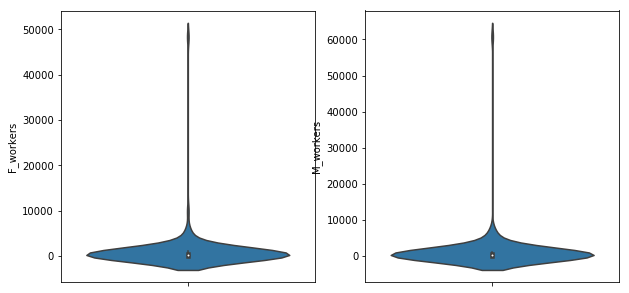

In [574]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.violinplot(x='F_workers', data=cleanedgenderwage, orient='v')
plt.subplot(1, 2, 2)
sns.violinplot(x='M_workers', data=cleanedgenderwage, orient='v')
plt.show()

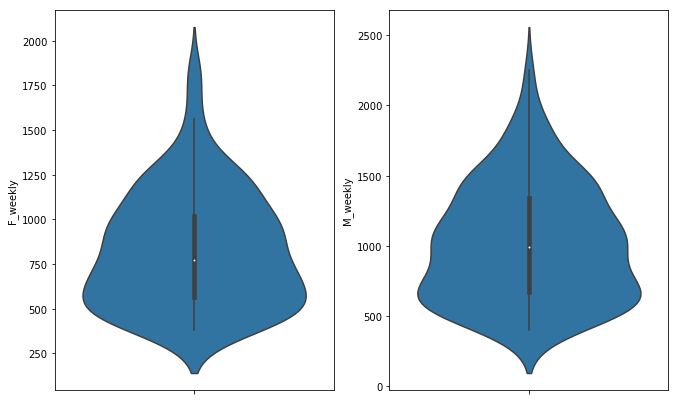

In [575]:
plt.figure(figsize=(11, 7))
plt.subplot(1, 2, 1)
sns.violinplot(x='F_weekly', data=cleanedgenderwage, orient='v')
plt.subplot(1, 2, 2)
sns.violinplot(x='M_weekly', data=cleanedgenderwage, orient='v')
plt.show()

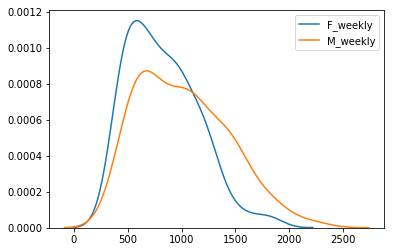

In [576]:
sns.kdeplot(data=cleanedgenderwage['F_weekly'])
sns.kdeplot(data=cleanedgenderwage['M_weekly'])
plt.show()

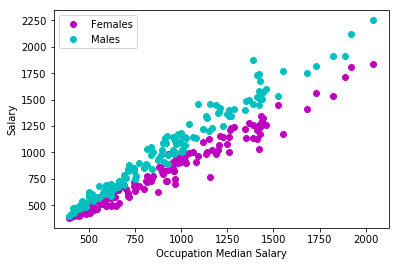

In [577]:
# look at female wages vs male wages on a scatter plot
plt.plot(cleanedgenderwage['All_weekly'], cleanedgenderwage['F_weekly'], 'o', color='m')
plt.plot(cleanedgenderwage['All_weekly'], cleanedgenderwage['M_weekly'], 'o', color='c')
plt.xlabel('Occupation Median Salary')
plt.legend(['Females','Males'])
plt.ylabel('Salary')
plt.show()

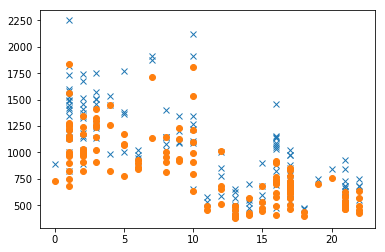

In [871]:
plt.plot(cleanedgenderwage['Occupation_Category'], cleanedgenderwage['M_weekly'], 'x')
plt.plot(cleanedgenderwage['Occupation_Category'], cleanedgenderwage['F_weekly'], 'o')
plt.show()

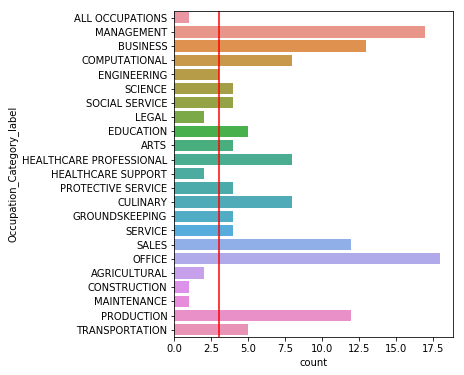

In [872]:
plt.figure(figsize=(5, 6))
sns.countplot(y=cleanedgenderwage['Occupation_Category_label'],
              data=cleanedgenderwage)
plt.axvline(x=3, color='red', linestyle='solid') # 3 is the number of neighbors needed later
plt.show()

## Now lets create some features

Woo!

In [579]:
# see weekly female wage as ratio to mens wage
cleanedgenderwage['WageGap_as_Ratio'] = cleanedgenderwage['F_weekly'] / cleanedgenderwage['M_weekly']

# see ratio of women to men
cleanedgenderwage['GenderRatio'] = cleanedgenderwage['F_workers'] / cleanedgenderwage['M_workers']

# check for count difference between All workers and M+F workers
cleanedgenderwage['All_Workers_Difference'] = cleanedgenderwage['All_workers'] - (cleanedgenderwage['M_workers'] + cleanedgenderwage['F_workers'])

# see female share of workers and complentary male share
cleanedgenderwage['F_share'] = cleanedgenderwage['F_workers'] / cleanedgenderwage['All_workers']
cleanedgenderwage['M_share'] = cleanedgenderwage['M_workers'] / cleanedgenderwage['All_workers']

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-v

In [580]:
def male_dom(x):
    if x > .85:
        return 0
    return 1

cleanedgenderwage['Male_Dominated'] = cleanedgenderwage['GenderRatio'].apply(male_dom)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [581]:
# a significant wage gap is 15% difference or more between womens wages compared to mens

cleanedgenderwage['Significant_wage_gap'] = np.where(cleanedgenderwage['WageGap_as_Ratio'] > .85, 0, 1)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [582]:
# same features, just in the categories dataframe
categories_df[['All_weekly',
            'M_weekly',
            'F_weekly']] = categories_df[['All_weekly',
                                       'M_weekly',
                                       'F_weekly']].apply(pd.to_numeric, errors='coerce')

categories_df['WageRatio'] = categories_df['F_weekly'] / categories_df['M_weekly']
categories_df['GenderRatio'] = categories_df['F_workers'] / categories_df['M_workers']
categories_df['WageGap'] = categories_df['M_weekly'] - categories_df['F_weekly']
categories_df['F_share'] = categories_df['F_workers'] / categories_df['All_workers']
categories_df['M_share'] = categories_df['M_workers'] / categories_df['All_workers']
categories_df['All_Workers_Difference'] = categories_df['All_workers'] - (categories_df['M_workers'] + categories_df['F_workers'])


categories_df.head()

,Occupation,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageRatio,GenderRatio,WageGap,F_share,M_share,All_Workers_Difference
0,ALL OCCUPATIONS,109080,809.0,60746,895.0,48334,726.0,0.811173,0.795674,169.0,0.443106,0.556894,0
1,MANAGEMENT,12480,1351.0,7332,1486.0,5147,1139.0,0.766487,0.701991,347.0,0.412420,0.587500,1
2,BUSINESS,5942,1137.0,2686,1327.0,3256,1004.0,0.756594,1.212211,323.0,0.547964,0.452036,0
3,COMPUTATIONAL,4009,1428.0,3036,1503.0,973,1245.0,0.828343,0.320487,258.0,0.242704,0.757296,0
4,ENGINEERING,2656,1424.0,2272,1452.0,383,1257.0,0.865702,0.168574,195.0,0.144202,0.855422,1


## Lets plot some of these new features
Looking at bar plots of weekly income by occupation, wage gap by occupation, gender ratio by occupation, wage ratio by occupation, and a scatter plot of mens weekly income and womens weekly income as a function of the reported occupation median income.

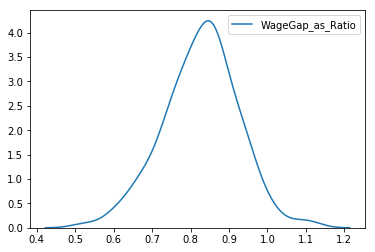

In [583]:
sns.kdeplot(data=cleanedgenderwage['WageGap_as_Ratio'])

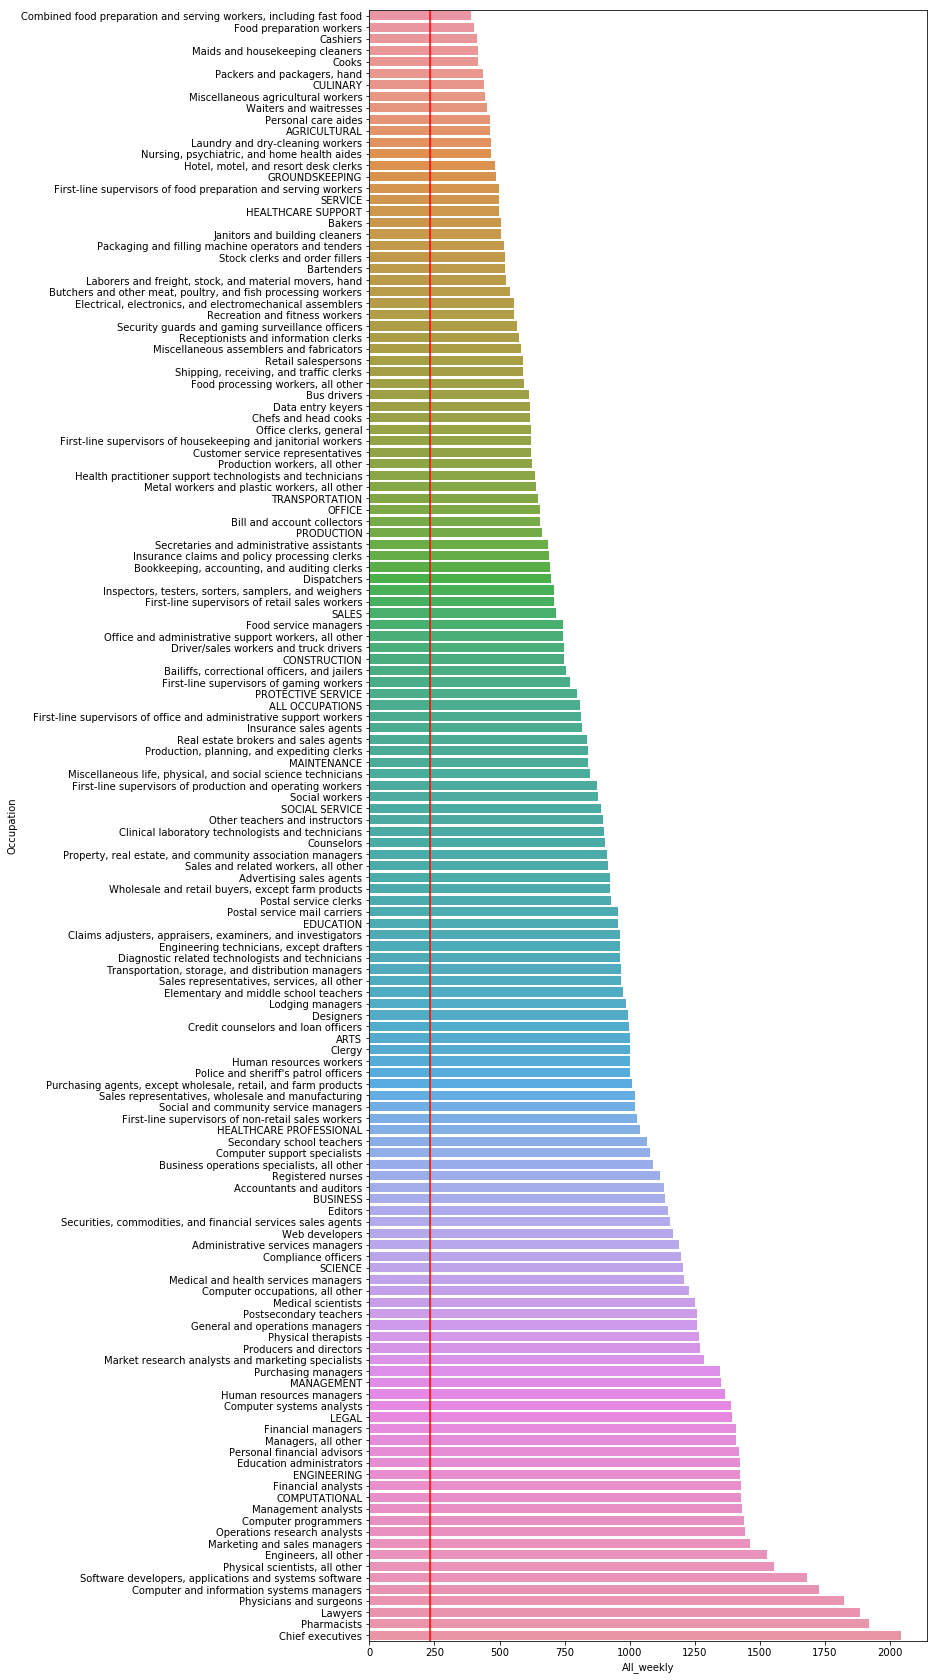

In [661]:
plt.figure(figsize=((10,30)))
sns.barplot(x='All_weekly',
            y='Occupation',
            data=cleanedgenderwage.sort_values('All_weekly', ascending=True))
# HHS defines poverty as $12,140 per year for one person
# That roughly divides into $233 per week(not accounting for taxes)
plt.axvline(x=233, color='red', linestyle='solid')
plt.show()

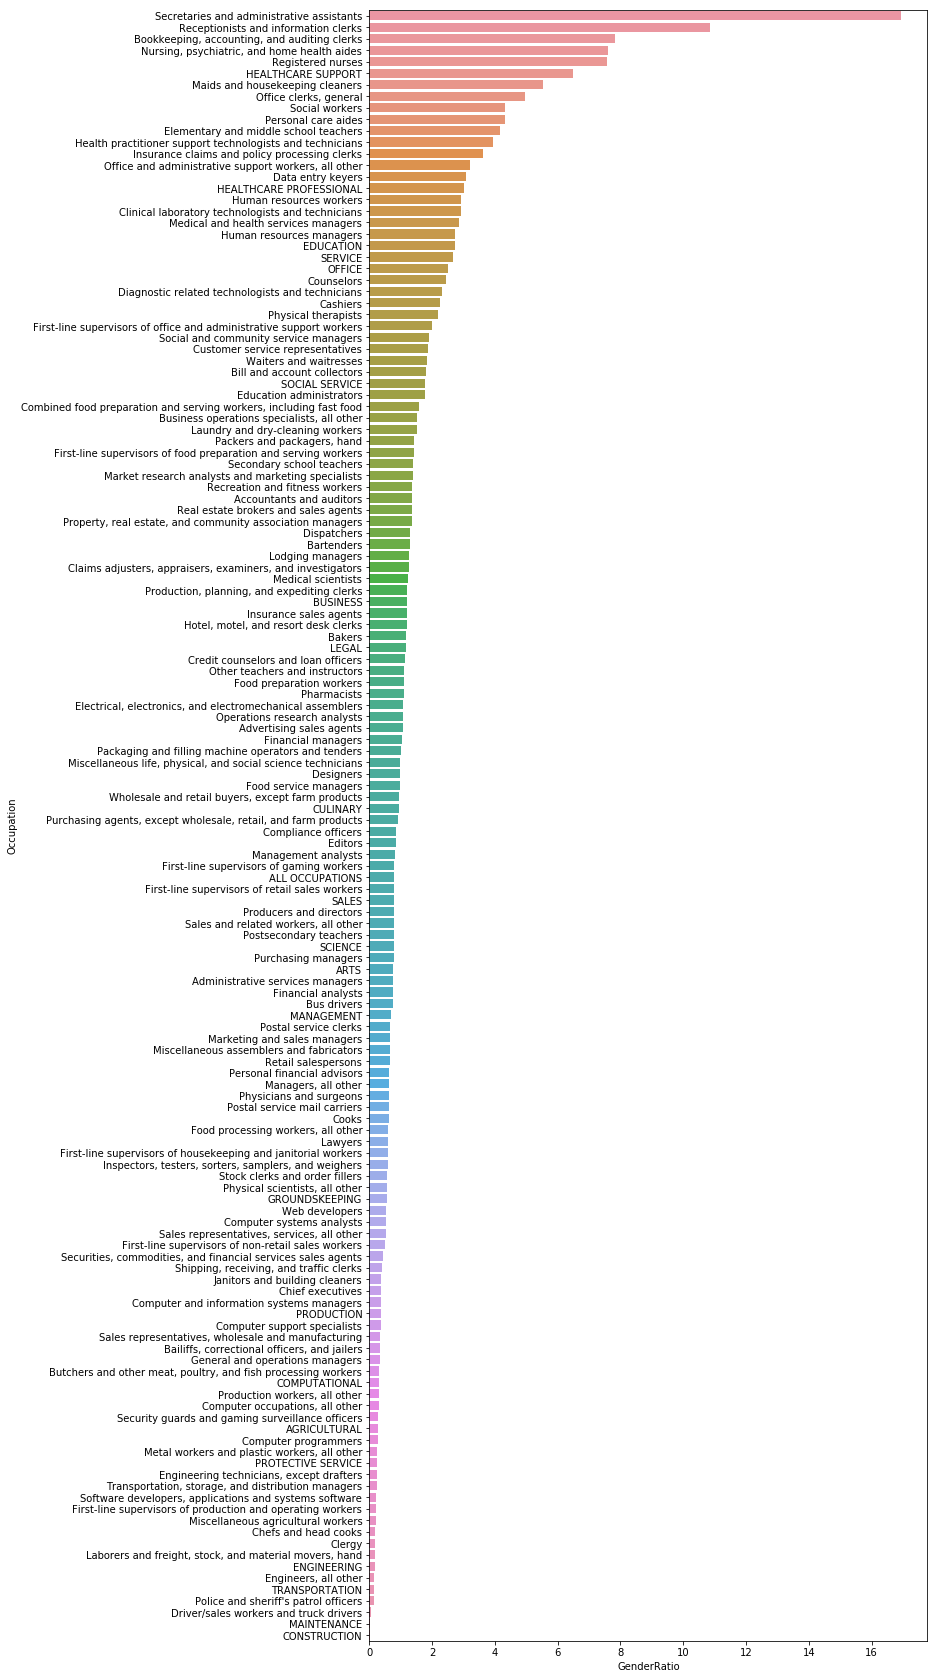

In [585]:
# Now lets look at the ratio of workers
plt.figure(figsize=((10,30)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=cleanedgenderwage.sort_values('GenderRatio', ascending=False))
plt.show()

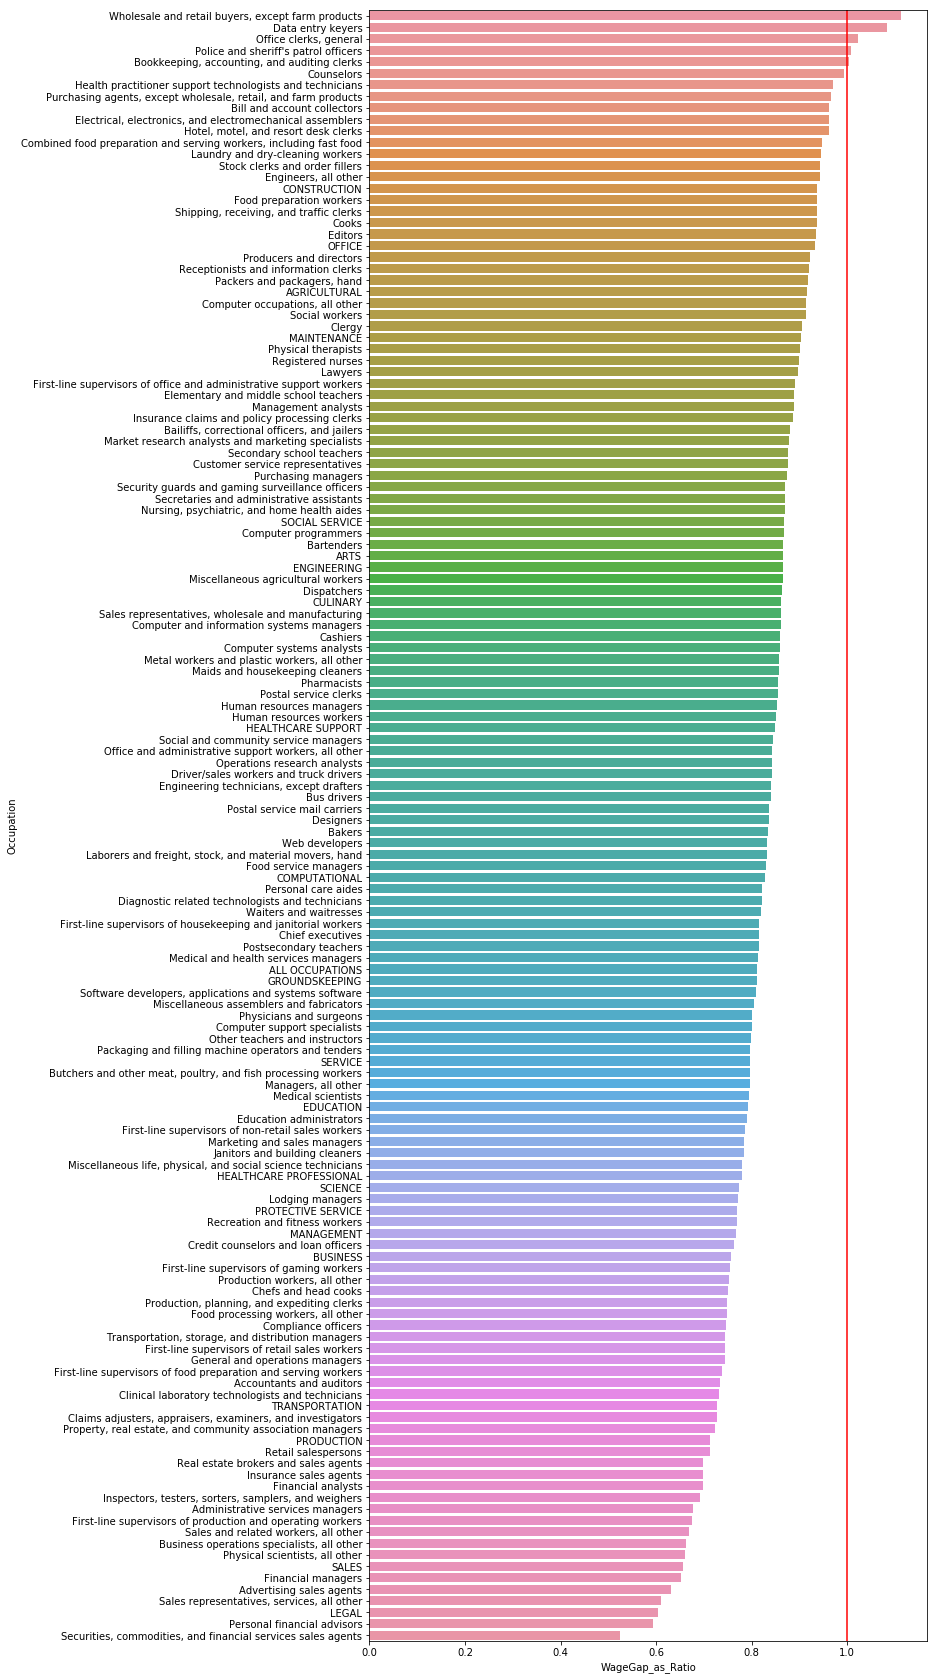

In [586]:
# Look at wage ratio by occupation
plt.figure(figsize=((10,30)))
sns.barplot(x='WageGap_as_Ratio',
            y='Occupation',
            data=cleanedgenderwage.sort_values('WageGap_as_Ratio', ascending=False))
plt.axvline(x=1, color='red', linestyle='solid')
plt.show()

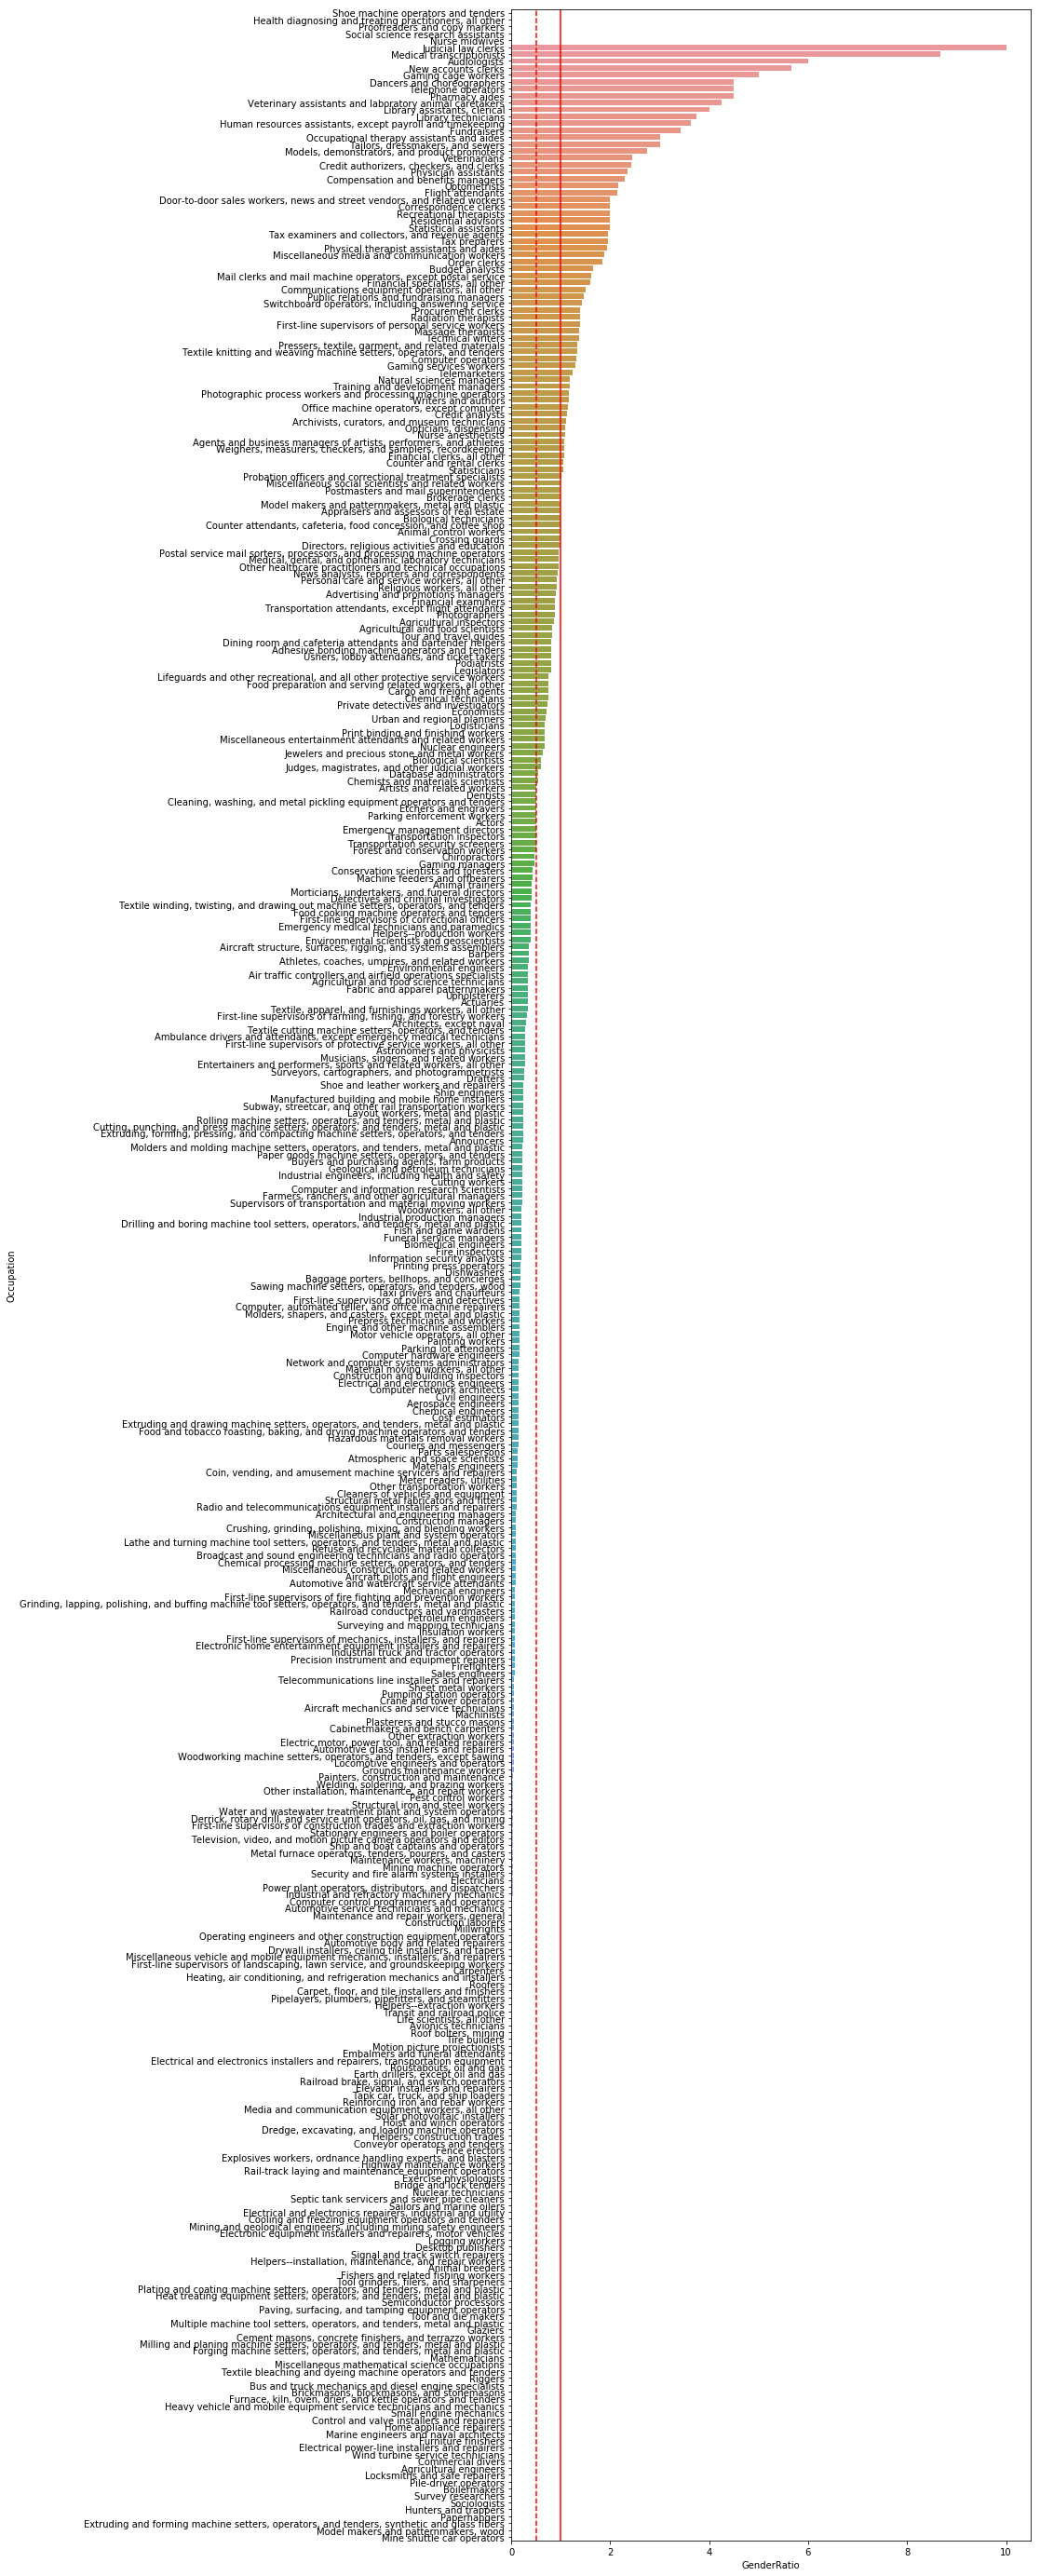

In [659]:
plt.figure(figsize=((10,50)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=no_wage_df.sort_values('GenderRatio', ascending=False))
plt.axvline(x=1, color='red', linestyle='solid')
plt.axvline(x=.5, color='red', linestyle='--')

plt.show()
plt.show()

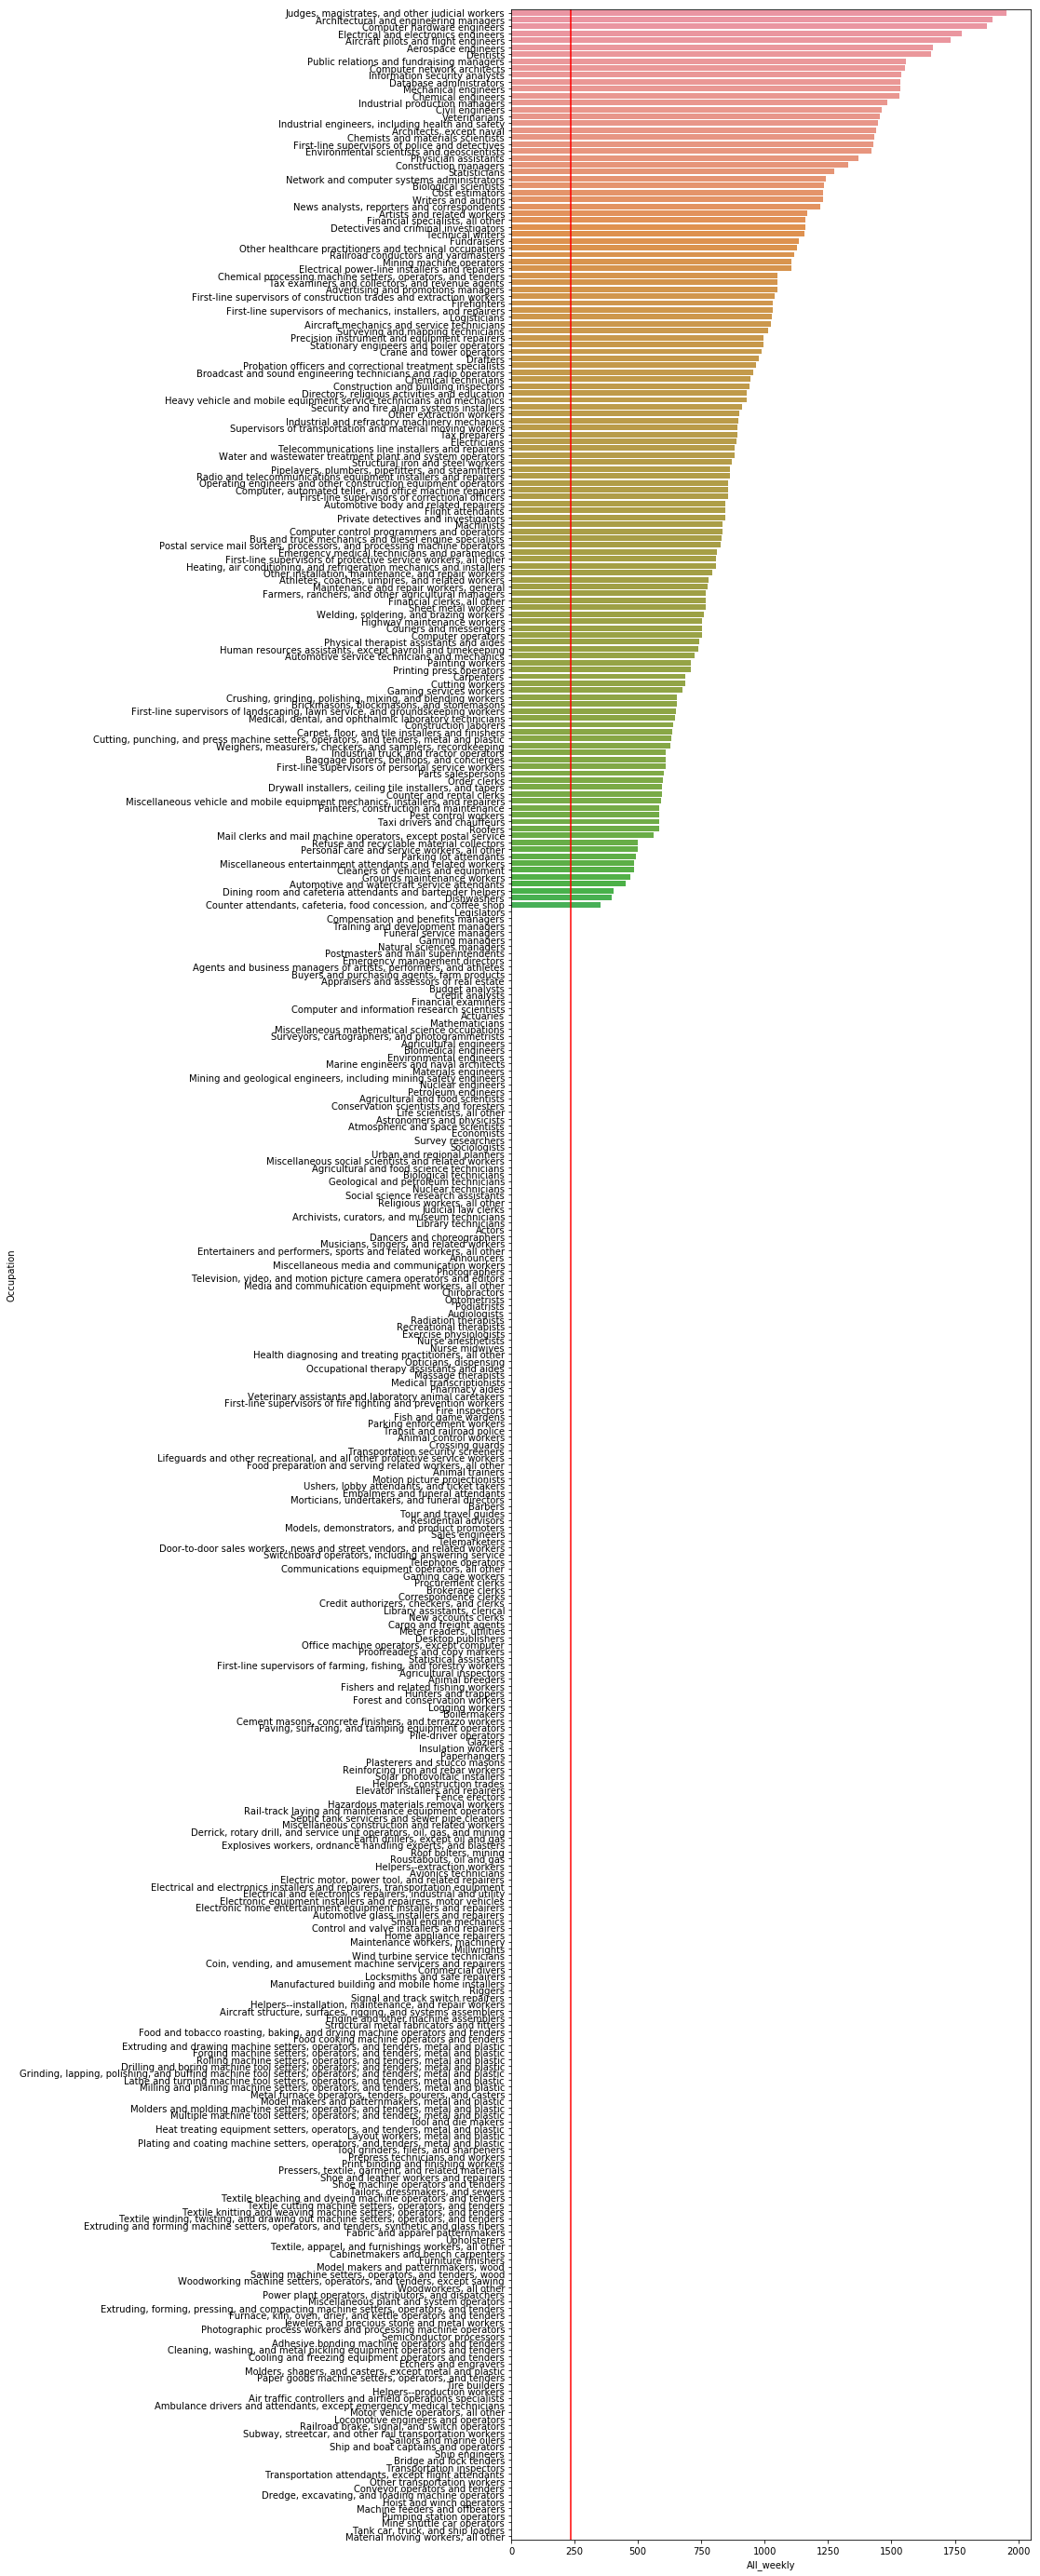

In [664]:
plt.figure(figsize=((10,50)))
sns.barplot(x='All_weekly',
            y='Occupation',
            data=no_wage_df.sort_values('All_weekly', ascending=False))
# HHS defines poverty as $12,140 per year for one person
# That roughly divides into $233 per week(not accounting for taxes)
# https://aspe.hhs.gov/poverty-guidelines
plt.axvline(x=233, color='red', linestyle='solid')
plt.show()

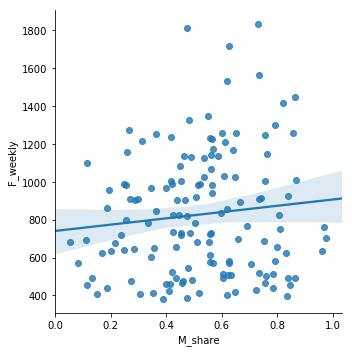

In [587]:
sns.lmplot(x='M_share', y='F_weekly', data=cleanedgenderwage)
plt.show()

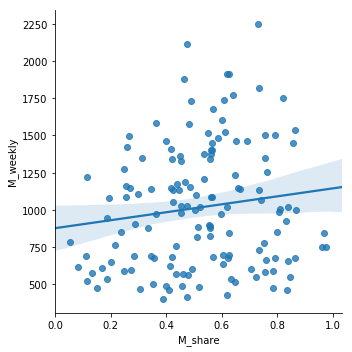

In [588]:
# lmplot of male wages vs male share
sns.lmplot(x='M_share', y='M_weekly', data=cleanedgenderwage)
plt.show()

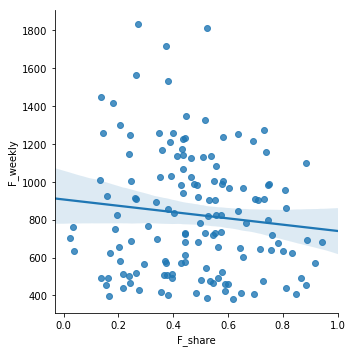

In [589]:
# lmplot of female wages vs female share
sns.lmplot(x='F_share', y='F_weekly', data=cleanedgenderwage)
plt.show() # looks like as women take over a field, it just pays less -.- 

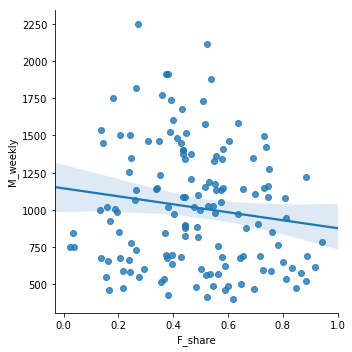

In [590]:
# lmplot of Male wages vs female share
sns.lmplot(x='F_share', y='M_weekly', data=cleanedgenderwage)
plt.show() 

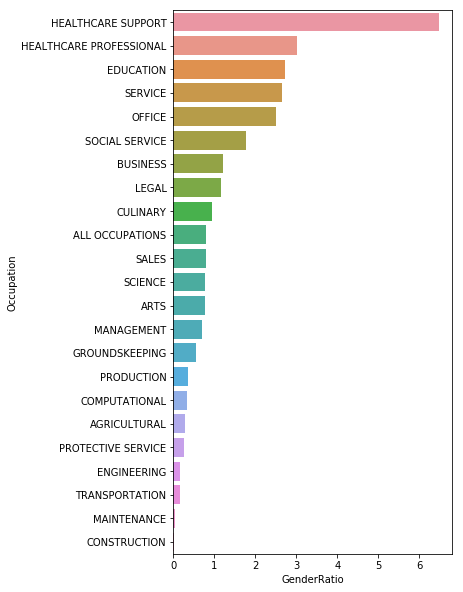

In [591]:
# Lets look at the gender ratio for just the occupational categories

plt.figure(figsize=((5,10)))
sns.barplot(x='GenderRatio',
            y='Occupation',
            data=categories_df.sort_values('GenderRatio', ascending=False))
plt.show()

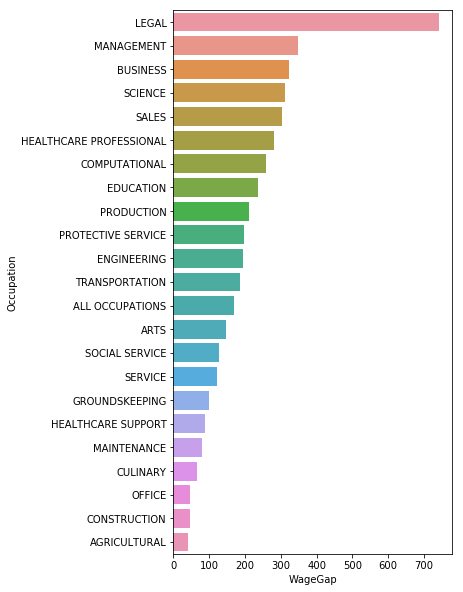

In [592]:
# Now lets see the wage gap
plt.figure(figsize=((5,10)))
sns.barplot(x='WageGap',
            y='Occupation',
            data=categories_df.sort_values('WageGap', ascending=False))
plt.show()

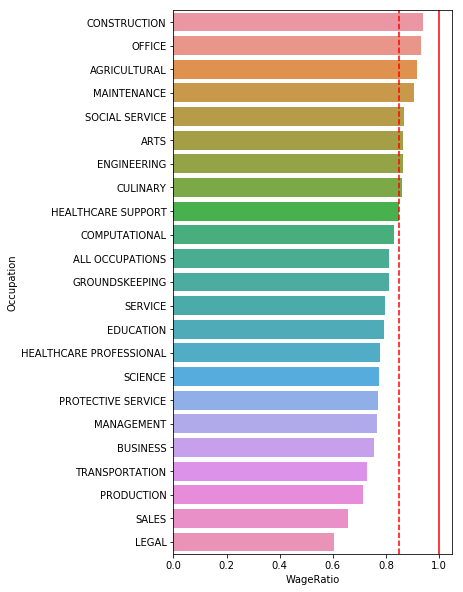

In [593]:
# Looking at wage ratios for men v women
# Red line indicates equal to mens wages, dashed line is 15% less 
plt.figure(figsize=((5,10)))
sns.barplot(x='WageRatio',
            y='Occupation',
            data=categories_df.sort_values('WageRatio', ascending=False))
plt.axvline(x=.85, color='red', linestyle='dashed')
plt.axvline(x=1, color='red', linestyle='solid')
plt.show()

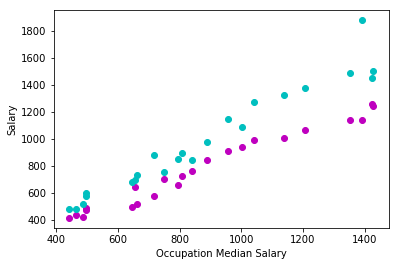

In [594]:
# Mens vs Womens salaries
plt.plot(categories_df['All_weekly'], categories_df['F_weekly'], 'o', color='m')
plt.plot(categories_df['All_weekly'], categories_df['M_weekly'], 'o', color='c')
plt.xlabel('Occupation Median Salary')
plt.ylabel('Salary')
plt.show()

In [596]:
# plot wages color coded to occupational category here
# do subplot with small plot for each category

In [677]:
cleanedgenderwage.head(1)

,Occupation,Occupation_Category,All_workers,All_weekly,M_workers,M_weekly,F_workers,F_weekly,WageGap_as_Ratio,GenderRatio,All_Workers_Difference,F_share,M_share,Male_Dominated,Significant_wage_gap
0,ALL OCCUPATIONS,0,109080,809.0,60746,895.0,48334,726.0,0.811173,0.795674,0,0.443106,0.556894,1,1


# Time for some MODELS

we will be reviewing linear or logisitic regression classifier, then lasso regression classifier, then a random forest classifier

The questions I will be looking to answer today is:
    - Can you predict occupational category given wage, gender, gender ratio and share of females?

In [793]:
# make new dfs here
F_df = pd.DataFrame()
M_df = pd.DataFrame()

# make category variable for gender
F_df['Wage'] = cleanedgenderwage['F_weekly']
M_df['Wage'] = cleanedgenderwage['M_weekly']

F_df['Gender'] = np.ones(len(cleanedgenderwage))
M_df['Gender'] = np.zeros(len(cleanedgenderwage))

F_df['F_share'] = cleanedgenderwage['F_share']
M_df['F_share'] = cleanedgenderwage['F_share']
F_df['GenderRatio'] = cleanedgenderwage['GenderRatio']
M_df['GenderRatio'] = cleanedgenderwage['GenderRatio']

F_df['Occupation_Category'] = cleanedgenderwage['Occupation_Category']
M_df['Occupation_Category'] = cleanedgenderwage['Occupation_Category']
F_df['Occupation_Median_wage'] = cleanedgenderwage['All_weekly']
M_df['Occupation_Median_wage'] = cleanedgenderwage['All_weekly']

combined_df = F_df.append(M_df)




In [794]:
combined_df.head()

,Wage,Gender,F_share,GenderRatio,Occupation_Category,Occupation_Median_wage
0,726.0,1.0,0.443106,0.795674,0,809.0
1,1139.0,1.0,0.412420,0.701991,1,1351.0
2,1836.0,1.0,0.270554,0.370904,1,2041.0
3,1002.0,1.0,0.245443,0.325282,1,1260.0
6,1258.0,1.0,0.398734,0.663158,1,1462.0


In [816]:
# set up training and testing sets, fit model, score model

def model_testing(model, X, y, test_size):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scored_model_train = model.score(X_train, y_train)
    scored_model_test = model.score(X_test, y_test)
    model_accuracy = accuracy_score(y_test, y_pred)
    print("Model Score with Training data:")
    print(scored_model_train)
    print("Model Score with Testing data:")
    print(scored_model_test)
    print("Accuracy Score")
    print(model_accuracy)
    
    
    

In [ ]:
def sampled_set(data, sample_count):
    sampled = np.random.choice(a=data, size=sample_count)
    return(sampled)


In [ ]:
np.repeat()

In [795]:
# scale columns here
scaler = StandardScaler()
columns = ['F_share','Gender','Wage','GenderRatio']
X = combined_df[columns]

X_std = StandardScaler().fit_transform(X)

y = combined_df['Occupation_Category']

In [879]:
len(combined_df)

284

In [708]:
# set up x and y variables
#X = combined_df.drop(['Occupation_Category'], axis=1)
#y = combined_df['Occupation_Category']

In [873]:
from sklearn.linear_model import LinearRegression

regs = LinearRegression()
#model_testing(regs, X_std, y, .35)

In [817]:
# Linear/logisitic Regression here
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
model_testing(logr, X_std, y, .35)

Model Score with Training data:
0.29347826086956524
Model Score with Testing data:
0.28
Accuracy Score
0.28


In [874]:
# Lasso Regression classifier here
lasso = linear_model.Lasso()
#model_testing(lasso, X_std, y, .35)

In [819]:
# Ridge Regression classifier here
ridge = linear_model.RidgeClassifier()
model_testing(ridge, X_std, y, .35)

Model Score with Training data:
0.2717391304347826
Model Score with Testing data:
0.25
Accuracy Score
0.25


In [820]:
# Random Forest Classifier here
forest = ensemble.RandomForestClassifier(n_estimators=300, max_depth=3)
model_testing(forest, X_std, y, .35)

Model Score with Training data:
0.47282608695652173
Model Score with Testing data:
0.31
Accuracy Score
0.31


In [821]:
# SVM?
from sklearn.svm import SVC
svc = SVC()
model_testing(svc, X_std, y, .35)

Model Score with Training data:
0.3695652173913043
Model Score with Testing data:
0.26
Accuracy Score
0.26


In [875]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
model_testing(dtree, X_std, y, .35)

Model Score with Training data:
1.0
Model Score with Testing data:
0.35
Accuracy Score
0.35


In [877]:
extree = ensemble.ExtraTreesClassifier()
model_testing(extree, X_std, y, .35)

Model Score with Training data:
1.0
Model Score with Testing data:
0.41
Accuracy Score
0.41


In [878]:
gradient = ensemble.GradientBoostingClassifier()
model_testing(dtree, X_std, y, .35)

Model Score with Training data:
1.0
Model Score with Testing data:
0.35
Accuracy Score
0.35


In [802]:
# Put hyper parameter adjustment here
from sklearn.model_selection import GridSearchCV

ridge_params = {'kernel':('poly', 'rbf'), 'C':[1, 10]}
log_params = {}
rand_forest_params = {}
svc_params = {}
extra_tree_param = {}
decision_tree_param = {}
gradient_params = {}

def check_grid(estimator, params):
    grid_classifier = GridSearchCV(estimator=estimator, param_grid=params)
    grid_classifier.fit(X_std, y)
    grid_classifier.score(X_std, y)

/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


0.5070422535211268

In [827]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k=3, ratio=.8, kind='regular')

In [828]:
X_smote, y_smote = smote.fit_sample(X_std, y)

/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/lib/python3.6/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 2, n_neighbors = 3

In [ ]:
# Put model validation here

# Put conclusion here